## Average Correct Rate of Control & CASK Groups by Active Poke Under Flipping Condition

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tools as tl
import paths

#### Define 2D lists to store values

In [2]:
# index 0 is control, index 1 is experiment
left_rate = [
    [], []
]

right_rate = [
    [], []
]

## Control Group

In [3]:
for path in paths.contigency_flip_ctrl:
    df = pd.read_csv(path)
    df = tl.preprocess_dataframe(df)
    rateL, rateR = tl.count_error_rate(df)
    left_rate[0].append(rateL)
    right_rate[0].append(rateR)

### Experiment Group

In [4]:
for path in paths.contigency_flip_cask:
    df = pd.read_csv(path)
    df = tl.preprocess_dataframe(df)
    rateL, rateR = tl.count_error_rate(df)
    left_rate[1].append(rateL)
    right_rate[1].append(rateR)

In [5]:
print("Left Active Average:", left_rate)
print("Right Active Average:", right_rate)

Left Active Average: [[0.49, 0.5, 0.41, 0.59, 0.57, 0.61], [0.57, 0.57, 0.56, 0.47, 0.35, 0.55, 0.41, 0.44, 0.38]]
Right Active Average: [[0.47, 0.39, 0.45, 0.22, 0.34, 0.32], [0.44, 0.37, 0.48, 0.4, 0.42, 0.43, 0.51, 0.47, 0.52]]


### Graphing

In [6]:
import numpy as np

In [7]:
# Calculate averages and standard deviation
left_averages = [np.mean(sublist) for sublist in left_rate]
right_averages = [np.mean(sublist) for sublist in right_rate]
left_sem = [np.std(data) / np.sqrt(len(data)) for data in left_rate]
right_sem = [np.std(data) / np.sqrt(len(data)) for data in right_rate]

In [8]:
print(left_averages)
print(right_averages)

[0.5283333333333332, 0.47777777777777775]
[0.365, 0.4488888888888889]


In [9]:
# Define groups
groups = ['Control Group', 'Experiment Group']

In [10]:
# Define xticks length
x = np.arange(len(groups))
width = 0.2

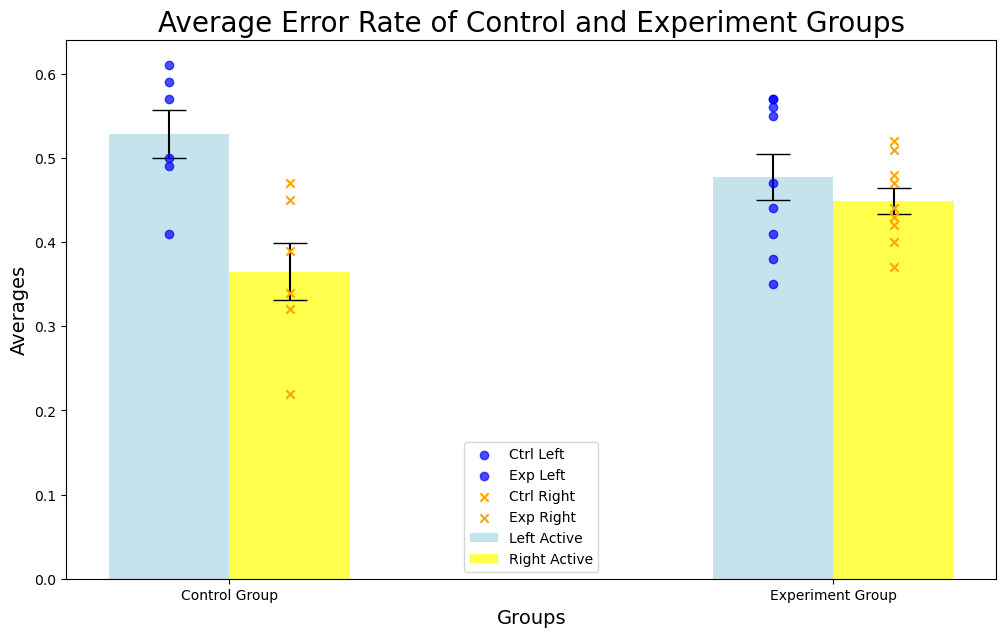

In [11]:
# Create the bar plot for averages
fig, ax = plt.subplots(dpi=100)
fig.set_size_inches(12, 7)
ctrl_bars = ax.bar(x - width/2, left_averages, width, label='Left Active',
                   color='lightblue', alpha=0.7, yerr=left_sem, capsize=12, zorder=1)
exp_bars = ax.bar(x + width/2, right_averages, width, label='Right Active',
                  color='yellow', alpha=0.7, yerr=right_sem, capsize=12, zorder=1)

ax.set_xlabel('Groups', fontsize=14)
ax.set_ylabel('Averages', fontsize=14)
ax.set_title('Average Error Rate of Control and Experiment Groups', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(groups)

x_values = np.full(len(left_rate[0]), x[0] - width/2)
ax.scatter(x_values, left_rate[0], marker='o', zorder=2,
           color='blue', label='Ctrl Left', alpha=0.7)
x_values = np.full(len(left_rate[1]), x[1] - width/2)
ax.scatter(x_values, left_rate[1], marker='o',zorder=2,
           color='blue', label='Exp Left', alpha=0.7)

x_values = np.full(len(right_rate[0]), x[0] + width/2)
ax.scatter(x_values, right_rate[0], marker='x', zorder=2,
           color='orange', label='Ctrl Right')
x_values = np.full(len(right_rate[1]), x[1] + width/2)
ax.scatter(x_values, right_rate[1], marker='x', zorder=2,
           color='orange', label='Exp Right')

ax.legend()
plt.show()


In [12]:
import scipy.stats as stats

In [13]:
statistic, p_value = stats.mannwhitneyu(left_rate[0], right_rate[0], alternative='two-sided')

print(f"U Statistic: {statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("There is a significant difference between the two groups.")
else:
    print("There is no significant difference between the two groups.")

U Statistic: 34.0
P-value: 0.008658008658008658
There is a significant difference between the two groups.


* Left Active blocks seems make mice performs worse(error rate around 50%) when flipping. (First Active Poke correlation?)
* Experimental Group has no obvious difference in accuracy of left and right active poke
* Control has significant difference (Mann-whitney U test), but may due to small amount of data point?